sigma bacchetta
[7.41251259e-07]

msimulation
18043465411.97601
merrsimulation
3.803455362546492e-07
qsimulation
2.1826215609712956e-16
qerrsimulation
2.381413322936604e-17

mdata
17966752649.676304
merrdata
94043037.51630443
qdata
0.09682075585183579
qerrdata
0.00819153584812754


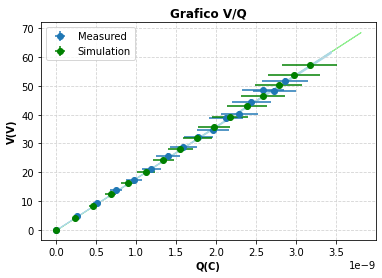

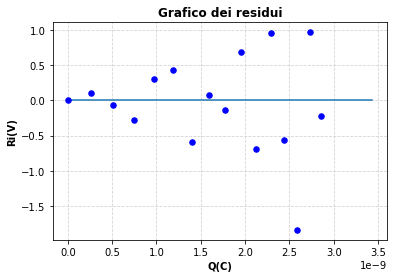

sigma_post_fit
0.720187383742945
chiquadro
11.950680282057563
chiquadroridotto
0.8536200201469688
sigma_PF_Pesata
[0.02771747 0.09239156 0.27717468 0.27717468 0.27717468 0.27717468
 0.92391559 0.92391559 0.92391559 0.92391559 0.92391559 0.92391559
 0.92391559 0.92391559 0.92391559 0.92391559]
Verr
[0.03 0.1  0.3  0.3  0.3  0.3  1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.  ]
[ 0.          4.15049471  8.25031161 12.30006948 16.30037954 20.25184556
 24.15506392 28.01062373 31.81910691 35.58108826 39.29713557 42.96780971
 46.59366467 50.17524771 53.71309939 57.20775367]


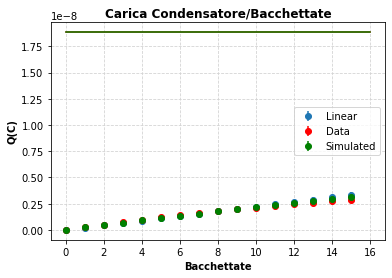

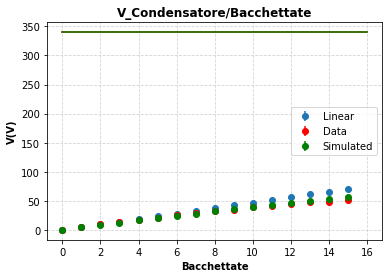

[2.61562819e-10 2.49266343e-10 2.37542911e-10 2.26370851e-10
 2.15724233e-10 2.05578345e-10 1.95909635e-10 1.86695661e-10
 1.77915038e-10 1.69547382e-10 1.61573271e-10 1.53974198e-10
 1.46732521e-10 1.39831433e-10 1.33254917e-10]


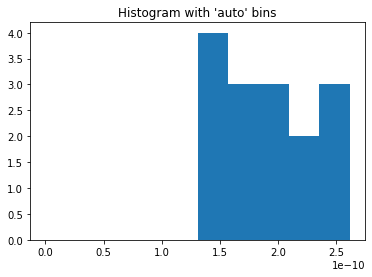

[ 0.          3.98467416  7.96934833 11.95402249 15.93869665 19.92337081
 23.90804498 27.89271914 31.8773933  35.86206746 39.84674163 43.83141579
 47.81608995 51.80076412 55.78543828 59.77011244]


In [1]:
#generatore attaccato alla sfera 1000VDC, bacchettata alla sfera
#misurare carica bacchetta sulla gabbia con l'elettrometro per induzione
#attaccare l'elettrometro al condensatore e dargli la bacchettata

#capire qual'è il punto del condensatore da toccare per avere la carica esatta
#ottenuta dalla lettura sulla gabbia 

#condensatore a d = 9mm (errore Ce proporzionale a Cc) e d=0.009<<sqrt(A)=0.15946

#1.6cm è quando si inizia a perdere l'approssimazione di faccie piane e parallele

#poi misurare V con l'elettrometro, ripetere le misure con altre bacchettate
#toccando sempre sfera e condensatore nello stesso punto


import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

eps0 = 8.859E-12

d = 0.009
derr = 0.001
#commentare
d = d-np.random.normal(0, derr, 1)

Dc = 0.18
Dcerr = 0.0001
Dc = Dc-np.random.normal(0, Dcerr, 1)
#Dc = 

A = np.pi/4*Dc**2
A_err = A*2*Dcerr/Dc

b = eps0*A
berr = b*A_err/A

Cc = b/d
Ccerr = Cc*((A_err/A)**2+(derr/d)**2)**(1/2)

D2 = 0.15
D1 = 0.1
D2err = 0.01
D1err = 0.0001
L = 0.15
Lerr = 0.0001

DBacchetta = 0.02
DBerr = 0.0001
SBacchetta = np.pi/4*DBacchetta**2
SBacchettaerr = SBacchetta*2*DBerr/DBacchetta

Cg = 2*np.pi*eps0*L/np.log(D2/D1)
epsL = Lerr/L
errlnD2 = D2err/D2
epslnD2 = errlnD2/np.abs(np.log(D2))
errlnD1 = D1err/D1
epslnD1 = errlnD1/np.abs(np.log(D1))
Cgerr = Cg*(epsL+epslnD1+epslnD2)

Sicepail = np.pi*D1/2*L
Sicepailerr = Sicepail*(Lerr/L+D1err/D1)

Ce = 2.65004892e-11
Ce_err = 3.94867194e-12

Veg = 4.94334415
Vegerr = 0.1
Veg = Veg-np.random.normal(0, Vegerr, 1)
#Veg = 
Qgsimulata = Veg*(Cg+Ce)
Qgsimulataerr = Qgsimulata*((((Cgerr)**2+Ce_err**2)**(1/2)/(Cg+Ce))**2+(Vegerr/Veg)**2)**(1/2)

QBacchetta = Qgsimulata*(1+SBacchetta/Sicepail)
QBacchettaerr = QBacchetta*(Qgsimulataerr/Qgsimulata+(SBacchettaerr+Sicepailerr)/(SBacchetta+Sicepail)+Sicepailerr/Sicepail)

Vec = np.array([0.0001,4.71959968,9.21722832,13.50332561,17.58784023,21.48025297,25.18959872,28.72448745,32.09312416,35.30332799,38.36255031,41.27789204,44.05612015,46.70368332,49.22672695,51.63110743])
#commentare
Vecerr = np.ones(len(Vec))
for i in range(len(Vecerr)):
	if(Vec[i]<25):
		Vecerr[i] = 0.3
		if(Vec[i]<8):
			Vecerr[i] = 0.1
		if(Vec[i]<2.5):
			Vecerr[i] = 0.03



Q = Vec*(Cc+Ce)
CcCe_err = ((Ccerr)**2+Ce_err**2)**(1/2)
Qerr = Q*((CcCe_err/(Cc+Ce))**2+(Vecerr/Vec)**2)**(1/2)
#commentare
Vec = Vec-np.random.normal(0, Vecerr, len(Vec))
#Vec = np.array([])
#Vecerr = np.array([])

Qsimulation = np.zeros(len(Vec))
Qsimulationerr = np.zeros(len(Vec))
Vesimulation = np.zeros(len(Vec))
Vesimulationerr = np.ones(len(Vec))*0.00001
for i in range(1,len(Vec)):
	Qsimulation[i] = (Qsimulation[i-1]+QBacchetta)*A/(A+SBacchetta)
	Qsimulationerr[i] = Qsimulation[i]*((Qsimulationerr[i-1]+QBacchettaerr)/(Qsimulation[i-1]+QBacchetta)+(A_err/A)+(A_err+SBacchettaerr)/(A+SBacchetta))
	Vesimulation[i] = Qsimulation[i]/(Cc+Ce)
 

for i in range(len(Vesimulationerr)):
	if(Vesimulation[i]<25):
		Vesimulationerr[i] = 0.3
		if(Vesimulation[i]<8):
			Vesimulationerr[i] = 0.1
		if(Vesimulation[i]<2.5):
			Vesimulationerr[i] = 0.03

print("sigma bacchetta")
print(QBacchetta/SBacchetta)



fig = plt.figure()
ax = fig.gca()
plt.title("Grafico V/Q",fontweight="bold")
plt.xlabel("Q(C)",fontweight="bold")
plt.ylabel("V(V)",fontweight="bold")

plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.errorbar(Q, Vec, yerr=Vecerr, xerr=Qerr, fmt='o',label="Measured")
plt.errorbar(Qsimulation,Vesimulation, yerr=Vesimulationerr, xerr=Qsimulationerr ,color = 'green', fmt='o',label="Simulation")

fit,cov = np.polyfit(Qsimulation,Vesimulation, 1,w = 1/Vesimulationerr,cov="True")
merr,qerr = np.sqrt(np.diag(cov))
m,q = fit
deltaYtot = (Vesimulationerr**2+(m*Qsimulationerr)**2)**(1/2)
fit,cov = np.polyfit(Qsimulation,Vesimulation, 1,w = 1/deltaYtot,cov="True")
merr,qerr = np.sqrt(np.diag(cov))
m,q = fit

print("\nmsimulation")
print(m)
print("merrsimulation")
print(merr)
print("qsimulation")
print(q)
print("qerrsimulation")
print(qerr)

x = np.linspace(min(Qsimulation),max(Qsimulation)*1.2,1000)
y = q + m*x 
y_erroreMin = (q-qerr) + (m-merr)*x
y_erroreMax = (q+qerr) + (m+merr)*x

plt.fill_between(x,y_erroreMin,y_erroreMax, color="lightgreen",zorder=1)


fit,cov = np.polyfit(Q,Vec, 1,w = 1/Vecerr,cov="True")
merr,qerr = np.sqrt(np.diag(cov))
m,q = fit
deltaYtot = (Vecerr**2+(m*Qerr)**2)**(1/2)
fit,cov = np.polyfit(Q,Vec, 1,w = 1/deltaYtot,cov="True")
merr,qerr = np.sqrt(np.diag(cov))
m,q = fit

print("\nmdata")
print(m)
print("merrdata")
print(merr)
print("qdata")
print(q)
print("qerrdata")
print(qerr)

x = np.linspace(min(Q),max(Q)*1.2,1000)
y = q + m*x 
y_erroreMin = (q-qerr) + (m-merr)*x
y_erroreMax = (q+qerr) + (m+merr)*x

plt.fill_between(x,y_erroreMin,y_erroreMax, color="lightblue",zorder=1)



plt.legend(loc="upper left")
plt.show()


#RESIDUI DATA
Vf = q+m*Q

Ri = Vf-Vec

fig = plt.figure()
ax = fig.gca()
plt.title("Grafico dei residui",fontweight="bold")
plt.xlabel("Q(C)",fontweight="bold")
plt.ylabel("Ri(V)",fontweight="bold")
plt.plot(np.linspace(min(Q),max(Q)*1.2,1000),np.zeros(1000))
plt.scatter(Q,Ri, s=30, color='blue',zorder=3)
plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.show()
#fig.savefig(f'Residui_Parte1_SET1.pdf',dpi = 300)

sigma_post_fit = (np.sum((Ri)**2)/(len(Vf)-2))**(1/2)
print("sigma_post_fit")
print(sigma_post_fit)

chiquadro = np.sum((Ri)**2/Vecerr**2)
print("chiquadro")
print(chiquadro)
chiquadroridotto = chiquadro/(len(Vf)-2)
print("chiquadroridotto")
print(chiquadroridotto)
sigma_PF_Pesata = Vecerr*(chiquadroridotto)**(1/2)
print("sigma_PF_Pesata")
print(sigma_PF_Pesata)
print("Verr")
print(Vecerr)

print(Vesimulation)

Bacchettate = np.arange(0,len(Vec),1)
Bacchettatedata = np.arange(0,len(Q),1)

fig = plt.figure()
ax = fig.gca()
plt.title("Carica Condensatore/Bacchettate",fontweight="bold")
plt.xlabel("Bacchettate",fontweight="bold")
plt.ylabel("Q(C)",fontweight="bold")

plt.grid(color='lightgray',linestyle="--",zorder=0)

QLinear = (Ce+Cg)*Vec[1]*Bacchettate
plt.errorbar(Bacchettate, QLinear, yerr=Qerr, fmt='o',label="Linear")
plt.errorbar(Bacchettatedata,Q, yerr=Qerr ,color = 'red', fmt='o',label="Data")
plt.errorbar(Bacchettate,Qsimulation,yerr=Qsimulationerr,color = 'green', fmt='o',label="Simulated")
plt.plot(np.linspace(0,len(Vec),1000),np.ones(1000)*QBacchetta*A/SBacchetta,color = 'red')
plt.plot(np.linspace(0,len(Vesimulation),1000),np.ones(1000)*QBacchetta*A/SBacchetta,color = 'green')
plt.legend(loc="best")
plt.show()

fig = plt.figure()
ax = fig.gca()
plt.title("V_Condensatore/Bacchettate",fontweight="bold")
plt.xlabel("Bacchettate",fontweight="bold")
plt.ylabel("V(V)",fontweight="bold")

plt.grid(color='lightgray',linestyle="--",zorder=0)

VLinear = QLinear/(Ce+Cg)
plt.errorbar(Bacchettate, VLinear, yerr=Vecerr, fmt='o',label="Linear")
plt.errorbar(Bacchettatedata,Vec, yerr=Vecerr ,color = 'red', fmt='o',label="Data")
plt.errorbar(Bacchettate,Vesimulation,yerr=Vesimulationerr,color = 'green', fmt='o',label="Simulated")
plt.plot(np.linspace(0,len(Vec),1000),np.ones(1000)*QBacchetta*A/SBacchetta/(Cc+Ce),color = 'red')
plt.plot(np.linspace(0,len(Vesimulation),1000),np.ones(1000)*QBacchetta*A/SBacchetta/(Cc+Ce),color = 'green')
plt.legend(loc="best")
plt.show()



#istogramma Q

Qtrasferita = np.zeros(len(Q)-1)

for i in range(1,len(Q)):
	Qtrasferita[i-1] = Q[i]-Q[i-1]

print(Qtrasferita)

rng = np.random.RandomState(10)
a = np.hstack((rng.normal(size=1000),

               rng.normal(loc=5, scale=2, size=1000)))

_ = plt.hist(Qtrasferita, bins=[max(Qtrasferita)*0,max(Qtrasferita)*1/10,max(Qtrasferita)*2/10,max(Qtrasferita)*3/10,max(Qtrasferita)*4/10,max(Qtrasferita)*5/10,max(Qtrasferita)*6/10,max(Qtrasferita)*7/10,max(Qtrasferita)*8/10,max(Qtrasferita)*9/10,max(Qtrasferita)])  # arguments are passed to np.histogram

plt.title("Histogram with 'auto' bins")

plt.show()


print(QLinear/(Cc+Ce))